In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#step1 Initialize Parameters
def initialize_params(n):
    return np.zeros((n, 1))

#step2 Compute Predictions
def predict(X, theta):
    return np.dot(X, theta)

#step3 Compute Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

#step4 Compute Gradients
def compute_gradient(X, y, theta):
    m = len(y)
    return (1 / m) * np.dot(X.T, (predict(X, theta) - y))

# Batch Gradient Descent
def batch_gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for _ in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    m = len(y)
    for _ in range(iterations):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            gradient = np.dot(xi.T, (predict(xi, theta) - yi))
            theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, alpha, iterations, batch_size=2):
    cost_history = []
    m = len(y)
    for _ in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            gradient = compute_gradient(X_batch, y_batch, theta)
            theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Momentum Gradient Descent
def momentum_gradient_descent(X, y, theta, alpha, iterations, beta=0.9):
    cost_history = []
    v = np.zeros_like(theta)
    for _ in range(iterations):
        gradient = compute_gradient(X, y, theta)
        v = beta * v + alpha * gradient
        theta -= v
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

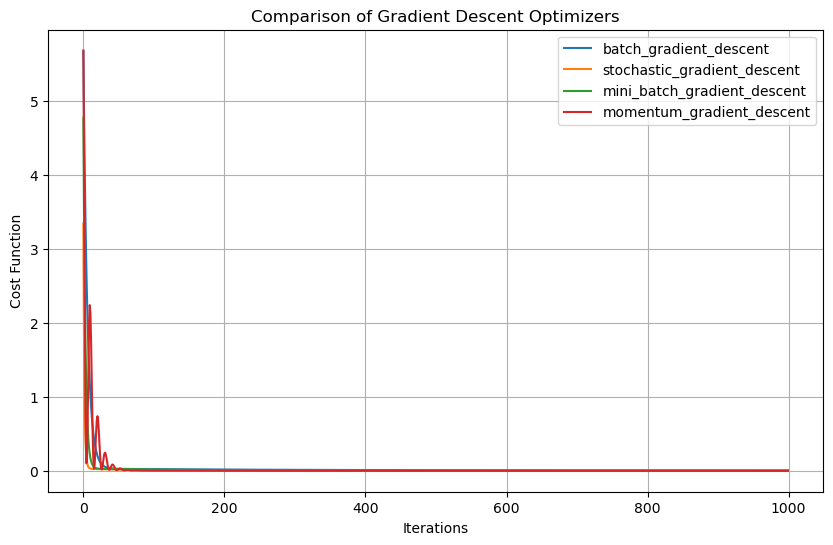

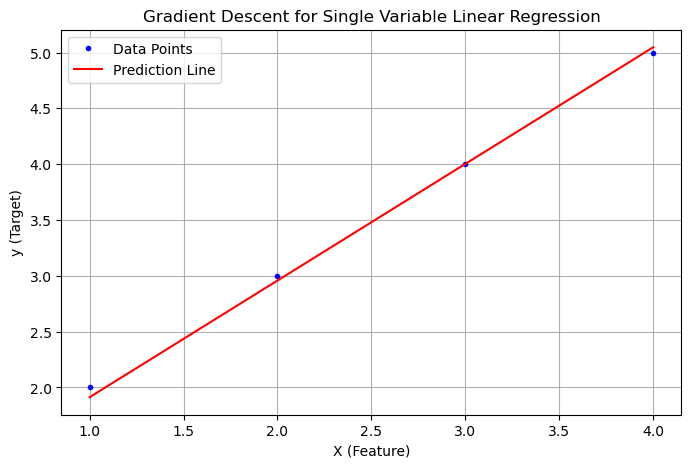

In [5]:
X = np.array([[1], [2], [3], [4]])
y = np.array([[2], [3], [4], [5]])

alpha = 0.01
iterations = 1000

# Initialize Theta
theta_init = initialize_params(X.shape[1] + 1)
X_b = np.c_[np.ones((len(X), 1)), X]  # Add bias term

# Run each optimizer
optimizers = [batch_gradient_descent, stochastic_gradient_descent, mini_batch_gradient_descent, momentum_gradient_descent]
results = {}

for optimizer in optimizers:
    theta, cost_history = optimizer(X_b, y, theta_init.copy(), alpha, iterations)
    results[optimizer.__name__] = cost_history


plt.figure(figsize=(10, 6))
for name, cost_history in results.items():
    plt.plot(range(iterations), cost_history, label=name)

plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.legend()
plt.title('Comparison of Gradient Descent Optimizers')
plt.grid(True)
plt.show()

#plot for single variable linear regression
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'b.', label='Data Points')
final_theta, _ = batch_gradient_descent(X_b, y, theta_init.copy(), alpha, iterations)
plt.plot(X, predict(X_b, final_theta), 'r-', label='Prediction Line')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.legend()
plt.title('Gradient Descent for Single Variable Linear Regression')
plt.grid(True)
plt.show()